# Assignment


### Description: In this assignment, you are required to design and analyse the K-Means Clustering.  For this implementation, use the       dataset attached in Lect-Assignment 05.  


### 1.   Content Preference & Genre Clustering:  (Features to be use)
            1. genre (one-hot encoded: Sci-Fi, Romance, Comedy, Thriller, Horror, Action)
            2. mood (one-hot encoded: exciting, funny, mysterious, chill, romantic, inspiring)
            3. tags (aggregated tag frequencies) 
            4. user_rating (explicit content rating)


### 2.  User Engagement & Behavior Clustering (Most Recommended) : (Features to be use)
            1. watched_duration_pct (engagement level)
            2. liked, disliked, re_watched (explicit feedback)
            3. watch_later, shared (social engagement)
            4. transaction_type (encoded: purchase=2, rental=1, subscription=0)
            5. amount_paid (monetary value)


### 3.  User Journey & Platform Behavior Clustering : (Features to be use)
            1. Device usage patterns
            2. Session characteristics
            3. Search behavior
            4. Watch patterns


### 4.   Content Performance & Genre Affinity Clustering: (Features to be use)
            1. Genre performance metrics
            2. Mood alignment
            3. Completion rates
            4. User ratings

# Clustering

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [33]:
data = pd.read_csv('movie_data.csv')

In [34]:
data 


,user_id,movie_id,movie_name,genre,timestamp,watched_duration_pct,liked,disliked,watch_later,shared,...,language,user_rating,age_group,safety_flag,data_source,mood,search_query,search_keywords,session_id,tags
0,c5fa3f7a-b0a4-4684-99d7-8a3b00241795,def85dab-ef16-428c-9625-91e1d5c05d2f,Agent every,Sci-Fi,2024-11-03 00:23:11,20.02,False,False,False,False,...,French,NaN,18-25,True,synthetic_v1,exciting,Quality throughout beautiful,"['quality', 'throughout', 'beautiful']",a0a904d3-234d-4510-8f18-03128cdbbdc0,"['Horror', 'mysterious']"
1,0af83eb4-1884-448c-832e-32d9dc2ae023,21d00494-71db-4f81-8bed-918893dab8a3,All behavior discussion,Romance,2025-03-30 03:07:58,64.18,False,False,False,False,...,English,NaN,26-35,True,synthetic_v1,funny,Current practice nation determine operation speak,"['current', 'practice', 'nation', 'determine',...",e8371aa2-56a9-4b97-abd7-da1036715d9a,"['Sci-Fi', 'Romance', 'Drama']"
2,718d4cb8-8b1f-451a-8aef-e412e91a7333,57064a20-2abf-428a-becf-5dfcdb77e2e7,Song,Comedy,2025-06-17 06:41:29,96.15,True,False,True,True,...,English,3.9,60+,True,synthetic_v1,exciting,Future choice whatever from behavior,"['future', 'choice', 'whatever', 'from', 'beha...",1247074d-90ef-40a5-ae99-d551f7138bc9,"['Comedy', 'romantic', 'Romance']"
3,26e1a02b-eec7-48b9-93fc-c0bf4940b066,d7eb6835-7796-4036-9caa-eb9eb78ac441,Grow gas,Thriller,2024-11-19 01:25:29,66.58,False,False,False,False,...,Spanish,NaN,18-25,True,synthetic_v1,mysterious,Role movie win,"['role', 'movie', 'win']",51b28aee-7e7e-4ccf-bce1-1471487797ee,"['mysterious', 'Comedy']"
4,0668938b-439a-4e22-a650-a42177fa1d35,e313d0ad-70fc-45f2-bccc-2a5ebbfacf86,Bad fall pick,Horror,2025-07-18 04:55:12,35.02,False,False,False,False,...,English,NaN,60+,True,synthetic_v1,funny,Officer relate animal direction eye,"['officer', 'relate', 'animal', 'direction', '...",9a46e3ac-5339-4af5-b614-1f16592bc49a,"['romantic', 'inspiring']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48fcaf97-abac-4de3-a783-780c45256b99,efd80b26-7257-406d-b0c5-aef68136b913,Mother every,Action,2025-07-17 02:20:33,11.93,False,False,False,False,...,Hindi,NaN,26-35,True,synthetic_v1,chill,Hot big safe they environmental,"['hot', 'big', 'safe', 'they', 'environmental']",6042b8bc-9169-4fba-b374-84760bee5dc3,"['Sci-Fi', 'chill']"
996,1ee1eeec-7b3e-4eab-9758-c7c88a701524,71943a4d-bc4e-42fd-aac5-8e8f1a911aa2,Commercial data,Drama,2025-04-12 16:14:33,62.51,False,False,False,False,...,Hindi,NaN,26-35,True,synthetic_v1,dark,Explain about continue traditional performance...,"['explain', 'about', 'continue', 'traditional'...",51e843be-3952-46af-b2cd-4f58d2eed7cf,"['romantic', 'chill']"
997,541400c1-1101-4c6d-aa6d-1919e88b7edc,d367b3d4-8812-4ad2-8f2e-3b10a9de9a1c,Color race,Horror,2024-10-12 01:09:35,24.25,False,False,False,False,...,Hindi,NaN,46-60,True,synthetic_v1,exciting,Tonight center actually listen free,"['tonight', 'center', 'actually', 'listen', 'f...",41050d7e-d392-4f5a-89a7-1202bbad4dc2,"['Drama', 'Thriller']"
998,ad3702a7-2c9d-4743-8b79-981bb2f0b505,b8ffed3b-f7b7-48ee-ac30-6b1d65c4120b,Window thing,Horror,2024-10-13 15:11:06,44.14,False,True,True,False,...,English,NaN,46-60,True,synthetic_v1,funny,Order wide on,"['order', 'wide', 'on']",461d684d-dca5-4308-94e2-5269059acd37,"['Sci-Fi', 'mysterious', 'Comedy', 'funny']"


In [35]:
features = ['watched_duration_pct', 'liked', 'disliked', 're_watched',
            'watch_later', 'shared', 'transaction_type', 'amount_paid']
X = data[features]


In [36]:
print(list(X.columns))


['watched_duration_pct', 'liked', 'disliked', 're_watched', 'watch_later', 'shared', 'transaction_type', 'amount_paid']


Sample Data:    genre_SciFi  genre_Romance  genre_Comedy  genre_Thriller  mood_exciting  \
0            1              0             0               0              1   
1            0              1             0               0              0   
2            0              0             1               0              1   
3            0              0             0               1              1   
4            1              0             0               0              1   
5            0              0             1               0              0   

   mood_funny  mood_romantic  tags_frequency  user_rating  
0           0              0              50          4.5  
1           1              1              10          3.2  
2           1              0              30          4.0  
3           0              0              60          4.8  
4           0              0              45          4.6  
5           1              0              20          3.5  


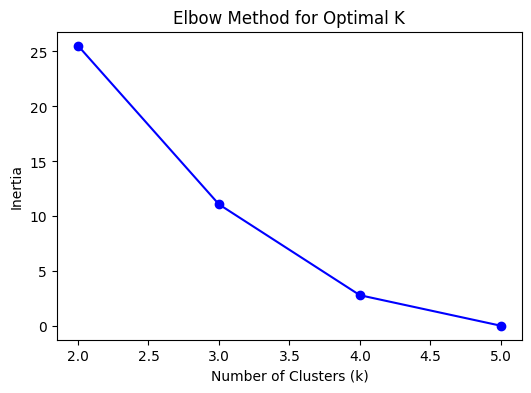

 Cluster Centers (Scaled):
[[-0.70710678  0.4472136   0.70710678 -0.4472136  -0.70710678  1.
   0.4472136  -0.90889326 -0.90582163]
 [ 0.70710678 -0.4472136  -0.70710678  0.4472136   0.70710678 -1.
  -0.4472136   0.90889326  0.90582163]]
Cluster Assignments:
   Cluster
0        1
1        0
2        0
3        1
4        1
5        0
Cluster Summary (Mean Values):
         genre_SciFi  genre_Romance  genre_Comedy  genre_Thriller  \
Cluster                                                             
0           0.000000       0.333333      0.666667        0.000000   
1           0.666667       0.000000      0.000000        0.333333   

         mood_exciting  mood_funny  mood_romantic  tags_frequency  user_rating  
Cluster                                                                         
0             0.333333         1.0       0.333333       20.000000     3.566667  
1             1.000000         0.0       0.000000       51.666667     4.633333  
Results saved as content_prefere

In [37]:
data = {
    'genre_SciFi': [1, 0, 0, 0, 1, 0],
    'genre_Romance': [0, 1, 0, 0, 0, 0],
    'genre_Comedy': [0, 0, 1, 0, 0, 1],
    'genre_Thriller': [0, 0, 0, 1, 0, 0],
    'mood_exciting': [1, 0, 1, 1, 1, 0],
    'mood_funny': [0, 1, 1, 0, 0, 1],
    'mood_romantic': [0, 1, 0, 0, 0, 0],
    'tags_frequency': [50, 10, 30, 60, 45, 20],
    'user_rating': [4.5, 3.2, 4.0, 4.8, 4.6, 3.5]
}

df = pd.DataFrame(data)
print("Sample Data:", df)

X = df.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
max_k = min(6, len(df))  # ensures k <= number of samples
K_range = range(2, max_k)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


optimal_k = 2  # based on Elbow (we can adjust)
kmeans_final = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)


print(" Cluster Centers (Scaled):")
print(kmeans_final.cluster_centers_)

print("Cluster Assignments:")
print(df[['Cluster']])

cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print("Cluster Summary (Mean Values):")
print(cluster_summary)

df.to_csv("content_preference_clusters.csv", index=False)
print("Results saved as content_preference_clusters.csv")
